# **Adel Kayyali**


---



---




**Machine learning project**

Predicting MRSP (manufacturer's suggested retail price)
* Read the cars CSV file and explore its columns
* Select features and target
* Split data to train and validation
* Preprocess data:
1. Clean missing values in numeric features
2. Clean missing values iin categoracal features
3. Encode categorical features
* Choose model for regression problem
* Model validation: create a function to test performance of the model
* Find best leaf nodes
* Single or cross validation?
* Build final model train it on all data

In [1]:
#Libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Upload the 'cars.csv' file to the colab files (since i don't have enough space in my drive)
df=pd.read_csv('/content/cars.csv')

In [3]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.020196827262044654

In [6]:
df.shape

(11914, 16)

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
#the 'Market Category' feature has too many N/A values so I decided to drop it (3700 out of 11900, which means more than the quarter of the data)
df.drop(columns='Market Category',inplace=True)

In [9]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [10]:
df['Number of Doors'].mode()

0    4.0
Name: Number of Doors, dtype: float64

In [11]:
df['Number of Doors'].fillna(4.0,inplace=True)

In [12]:
df['Engine Fuel Type'].mode()

0    regular unleaded
Name: Engine Fuel Type, dtype: object

In [13]:
df['Engine Fuel Type'].fillna('regular unleaded',inplace=True)

In [14]:
df[df['Engine Cylinders'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800


In [15]:
df['Engine Cylinders'].fillna(0.0,inplace=True)
#I filled all the null values of this feature with the value (0.0) because mostly,, all the FULL ELECTRIC CARS have no cylinders.

In [16]:
df[df['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950


In [17]:
df['Engine HP'].mean()

249.38607007176023

In [18]:
df['Engine HP'].fillna(249.38607007176023 ,inplace=True)

In [19]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64



---



---



# **Encoding The Categorical Features**

In [20]:
cols_cat = df.select_dtypes('object').columns
cols_cat = cols_cat.to_list()
cols_cat

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [21]:
df[cols_cat].describe()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11914,11914,11914,11914,11914,11914,11914
unique,48,915,10,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1123,156,7175,8266,4787,4764,3048


In [22]:
df.shape

(11914, 15)

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[cols_cat] = oe.fit_transform(df[cols_cat])
df.shape

(11914, 15)

--- 
---

# **Choose model**

In [24]:
X = df.drop(columns='MSRP')
y = df['MSRP']

X.shape, y.shape

((11914, 14), (11914,))

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9531, 14), (2383, 14), (9531,), (2383,))

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# **Model Validation**

In [27]:
from sklearn.metrics import mean_squared_error
import math

def model_validation(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = math.sqrt(mse)
  print("RMSE: ", rmse)


model_validation(y_val, y_pred)

RMSE:  31574.15348686775


In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
model_validation(y_val, y_pred)

RMSE:  10540.065408621895


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
model_validation(y_val, y_pred)

RMSE:  6670.037424233324


---
---
# **Best Leaf Node**

In [30]:
leafs = range(125,350,25)
err = [] # error list

for leaf in leafs:
  model = RandomForestRegressor(max_leaf_nodes = leaf)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  err.append(math.sqrt(mean_squared_error(y_val, y_pred)))

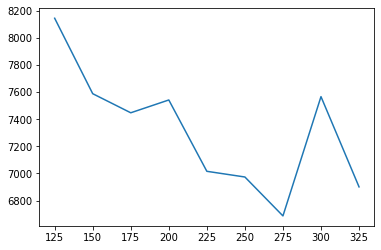

In [31]:
import matplotlib.pyplot as plt
plt.plot(leafs, err)

# **Best n estimator**

In [32]:
n_estimators = range(100,501,100)
err = []

for n in n_estimators:
  model = RandomForestRegressor(n_estimators=n, max_leaf_nodes=325)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  err.append(math.sqrt(mean_squared_error(y_val, y_pred)))

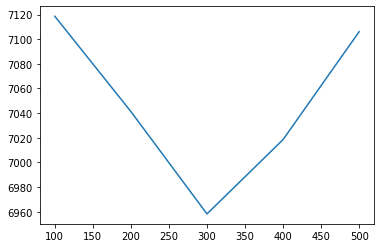

In [33]:
plt.plot(n_estimators, err)

---
---
# **Single or Cross**

In [34]:
# Single
model = RandomForestRegressor(200, max_leaf_nodes=325)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
model_validation(y_val, y_pred)

RMSE:  6743.684671593706


In [35]:
# Cross
from sklearn.model_selection import cross_val_score

scores  =  -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Take the Root for each value
for score in range(len(scores)):
  scores[score] = math.sqrt(scores[score])

scores

array([65645.94906927, 22821.01334784, 44034.14320784, 34650.81674299,
       57836.15813207])

In [36]:
# The mean for the scores
scores.mean()

44997.61610000079

Single is Better than cross validation

---
--- 
# **Build final model**

In [37]:
final_model = RandomForestRegressor(200, max_leaf_nodes=325)
final_model.fit(X, y)
y_pred = model.predict(X_val)
model_validation(y_val, y_pred)
#RMSE:  6743.684671593706

RMSE:  6743.684671593706
